In [1]:
PATH="../input/train/train"

**Required packages**

In [2]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import tensorflow
from sklearn.model_selection import train_test_split
from keras.callbacks import ModelCheckpoint
from glob import glob
import cv2
from keras import optimizers
from keras.applications import VGG16, ResNet50, VGG19, InceptionV3

**Define a CNN model**

In [4]:
model = Sequential()
# The first two layers with 32 filters of window size 3x3
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(150,150,3)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
sgd = optimizers.SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 150, 150, 32)      896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 148, 148, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 74, 74, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
__________

**Generate batches of tensor image data with real-time data augmentation. The data will be looped over (in batches)**

In [6]:
train_datagen = ImageDataGenerator(rescale = 1.0/255, 
                                   shear_range = 0.2, 
                                   zoom_range = 0.2, 
                                   horizontal_flip = True, 
                                   validation_split = 0.2)

**Takes the path to a directory & generates batches of training set augmented data**

In [7]:
training_set = train_datagen.flow_from_directory(PATH, 
                                                 target_size = (150, 150), 
                                                 batch_size = 32,
                                                 subset = 'training')

Found 17943 images belonging to 10 classes.


**Takes the path to a directory & generates batches of validation set augmented data**

In [8]:
validation_set = train_datagen.flow_from_directory(PATH, 
                                                   target_size = (150, 150), 
                                                   batch_size = 32,
                                                   subset = 'validation')


Found 4481 images belonging to 10 classes.


**Function to read image dataset**

In [10]:
def read_image(path):

    image = cv2.imread(path, cv2.IMREAD_COLOR)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

labels = ['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9']

column = {'c0': 'safe driving',
'c1': 'texting - right',
'c2': 'talking on the phone - right',
'c3': 'texting - left',
'c4': 'talking on the phone - left',
'c5':'operating the radio',
'c6': 'drinking',
'c7': 'reaching behind',
'c8': 'hair and makeup',
'c9': 'talking to passenger'}

In [18]:
data_dir1="../input/train"

**Plotting Corresponding Labels that belongs to particular class**

				# c0 : safe driving


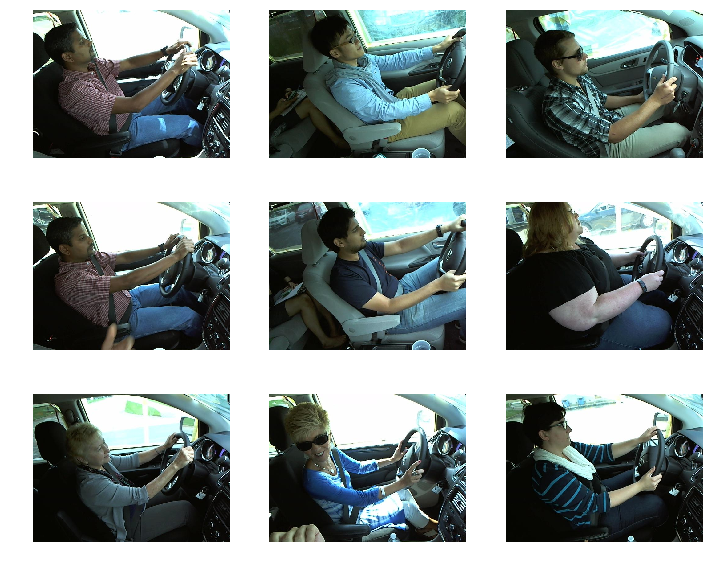

				# c1 : texting - right


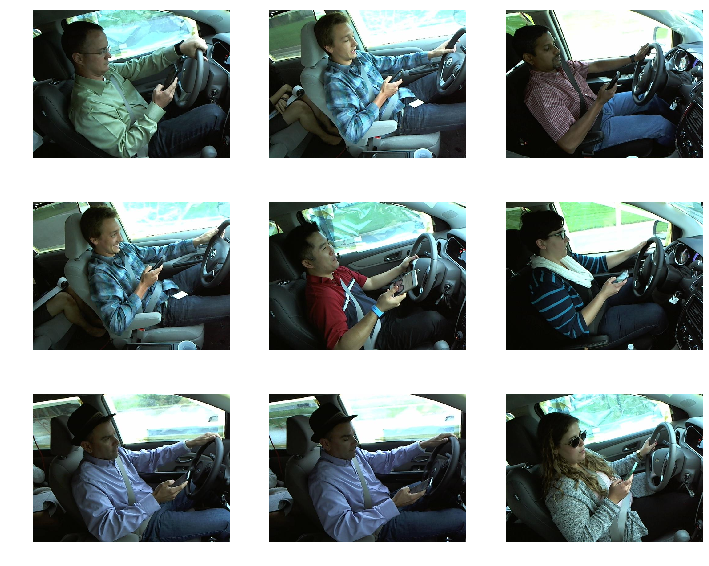

				# c2 : talking on the phone - right


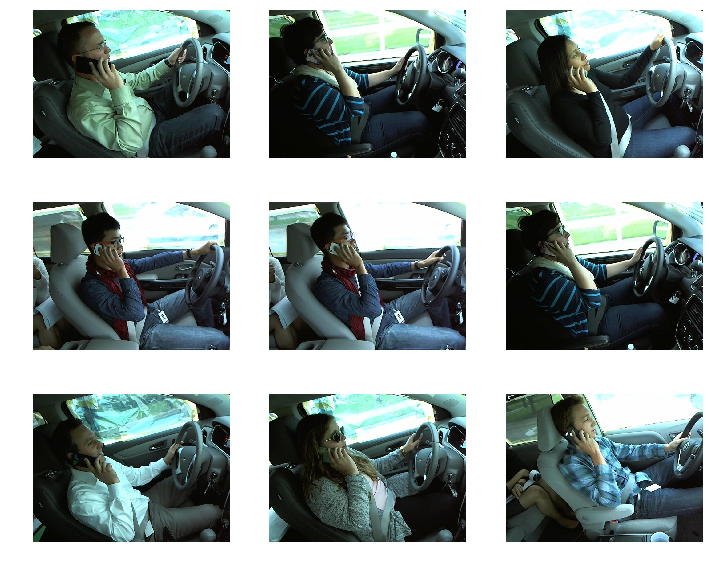

				# c3 : texting - left


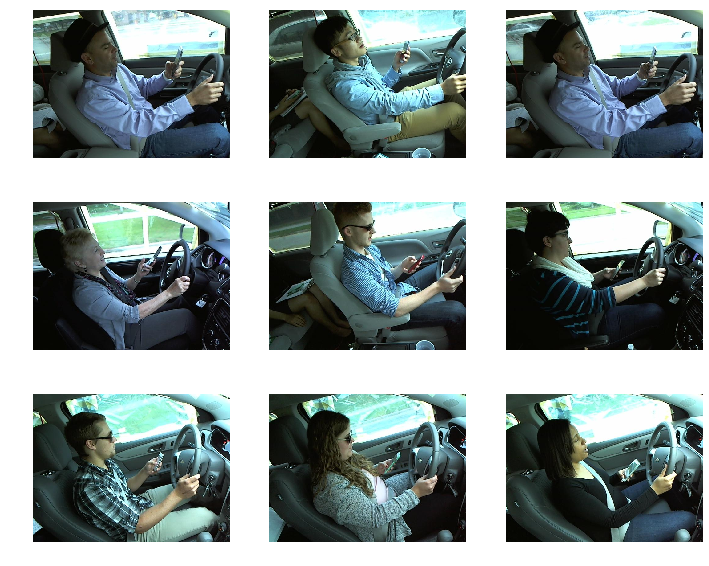

				# c4 : talking on the phone - left


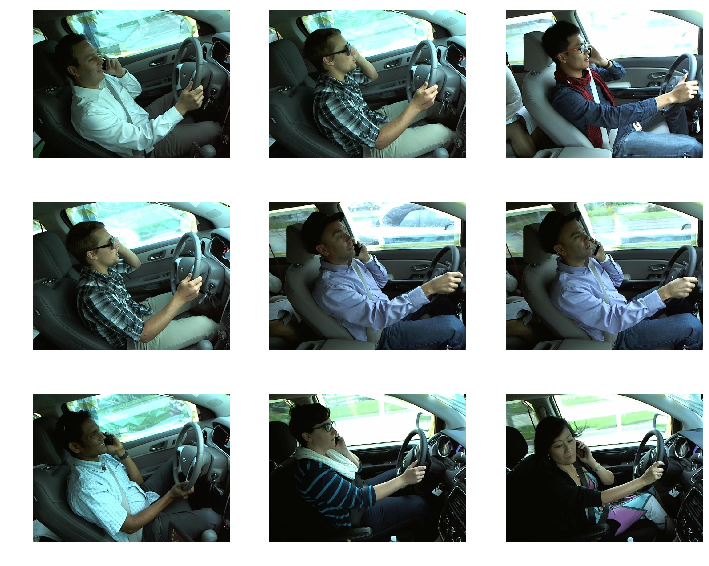

				# c5 : operating the radio


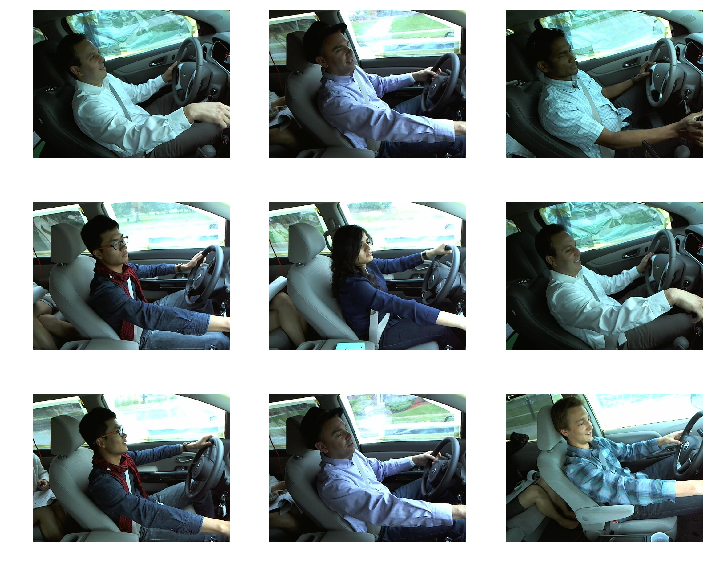

				# c6 : drinking


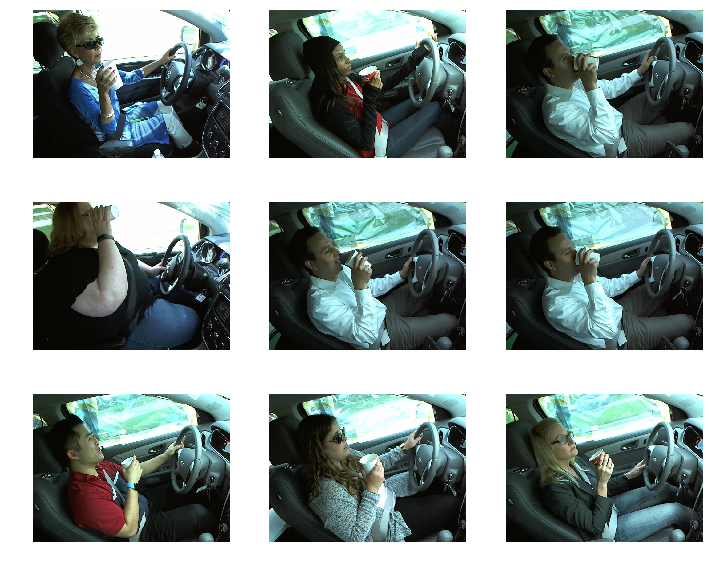

				# c7 : reaching behind


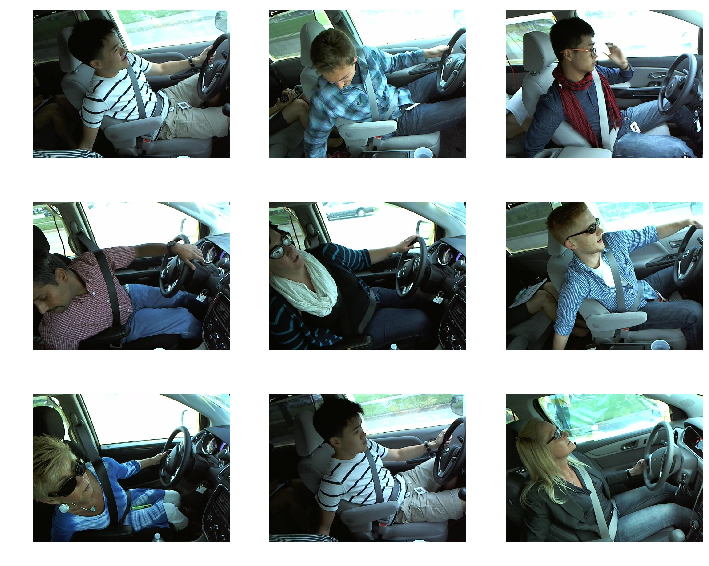

				# c8 : hair and makeup


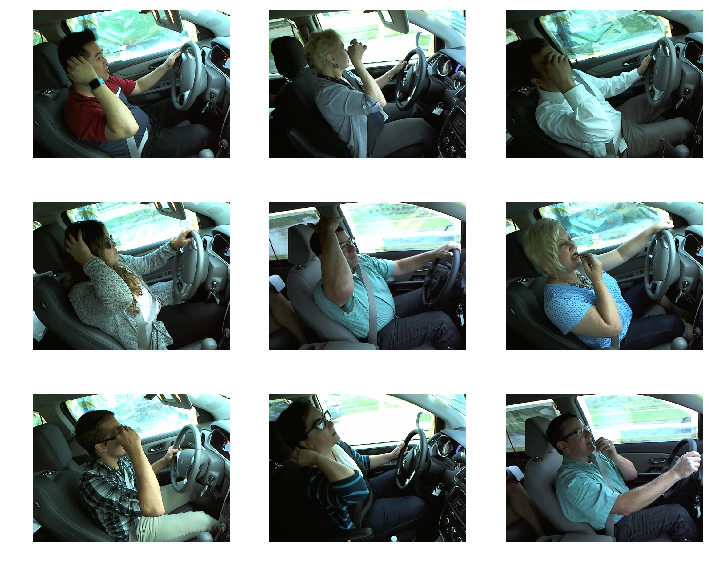

				# c9 : talking to passenger


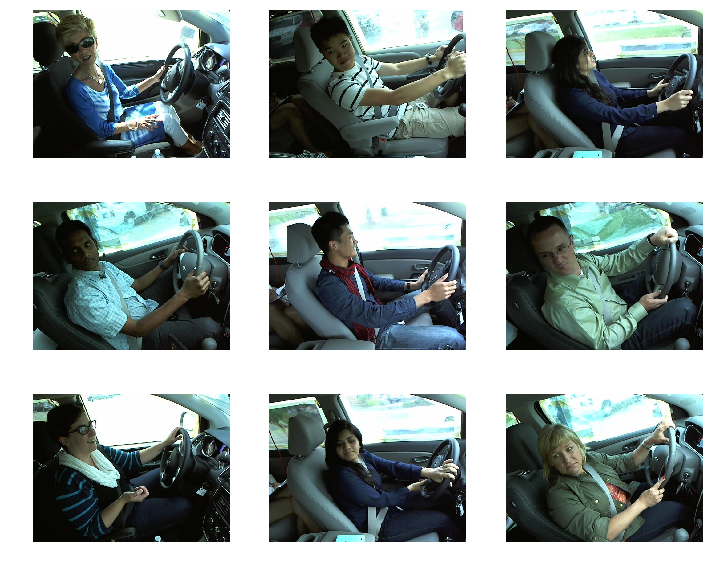

In [19]:
for label in labels:
    f, ax = plt.subplots(figsize=(12, 10))
    files = glob('{}/train/{}/*.jpg'.format(data_dir1, label))
    
    print('\t\t\t\t# {} : {}'.format(label, column[label]))
    for x in range(9):
        plt.subplot(3, 3, x+1)
        image = read_image(files[x])
        plt.imshow(image)
        plt.axis('off')
    plt.show()
    

**Checkpoint is a snapshot of the state of the system taken in case of system failure. If there is a problem not everything is lost. It may be used directly, or used as the starting point for a new run, picking up where it left off.**

In [24]:
filepath = "saved-model-{epoch:02d}-{val_acc:.2f}.hdf5"   #to save the model
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

**The .fit_generator function accepts the batch of data, performs backpropagation, and updates the weights in model.**

In [21]:
model.fit_generator(training_set,
                         steps_per_epoch = 17950/32,
                         epochs = 20,
                         validation_data = validation_set,
                         validation_steps = 4483/32,
                         callbacks=callbacks_list)

Epoch 1/20
561/560 [==============================] - 268s 478ms/step - loss: 2.2942 - acc: 0.1203 - val_loss: 2.2733 - val_acc: 0.1906

Epoch 00001: val_acc improved from -inf to 0.19058, saving model to saved-model-01-0.19.hdf5
Epoch 2/20
561/560 [==============================] - 214s 382ms/step - loss: 2.0696 - acc: 0.2587 - val_loss: 1.7492 - val_acc: 0.4320

Epoch 00002: val_acc improved from 0.19058 to 0.43205, saving model to saved-model-02-0.43.hdf5
Epoch 3/20
561/560 [==============================] - 215s 383ms/step - loss: 1.5637 - acc: 0.4566 - val_loss: 1.1801 - val_acc: 0.6177

Epoch 00003: val_acc improved from 0.43205 to 0.61772, saving model to saved-model-03-0.62.hdf5
Epoch 4/20
561/560 [==============================] - 215s 384ms/step - loss: 1.1851 - acc: 0.5939 - val_loss: 0.8292 - val_acc: 0.7347

Epoch 00004: val_acc improved from 0.61772 to 0.73466, saving model to saved-model-04-0.73.hdf5
Epoch 5/20
561/560 [==============================] - 217s 387ms/step -

In [26]:
model.load_weights("saved-model-20-0.96.hdf5")